In [99]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import FinanceDataReader as fdr
import seaborn as sns
import time
start_time = time.time()
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
import warnings
warnings.filterwarnings(action='ignore')
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [100]:
def read_csv_by_dir(path, index_col=None):
    df_raw = pd.DataFrame()
    for files in os.listdir(path):
        if files.endswith('.csv'):
            df = pd.read_csv('/'.join([path,files]),
                            index_col=index_col)
        df_raw = pd.concat((df_raw,df),axis=0)
    return df_raw

In [101]:
def index_to_datetime(df,format):
    df.index = pd.to_datetime(df.index,
                              format=format)
    return df

In [102]:
def check_datetime(df):
    print(df.name)
    print(df.select_dtypes('datetime64[ns]').head(1).index[0])
    print(df.select_dtypes('datetime64[ns]').tail(1).index[0])
    return None


In [103]:
path = 'C:/Everydata/competition_data'
_df_rf_raw = read_csv_by_dir('/'.join([path,'rf_data']),
                            index_col=0)

_df_water_raw = read_csv_by_dir('/'.join([path,'water_data']),
                               index_col=0)

_submission_raw = pd.read_csv('/'.join([path,'sample_submission.csv']),
                             index_col=0)

In [104]:
df_rf=_df_rf_raw.copy()
df_rf.name = "rain_data"

df_water=_df_water_raw.copy()
df_water.name = "water_data"

submission=_submission_raw.copy()
submission.name = "submission"

In [105]:
df_rf.head(5)

,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,
2012-05-01 00:00,0.0,0.0,0.0
2012-05-01 00:10,0.0,0.0,0.0
2012-05-01 00:20,0.0,0.0,0.0
2012-05-01 00:30,0.0,0.0,0.0
2012-05-01 00:40,0.0,0.0,0.0


In [106]:
df_water.head(5)

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
ymdhm,,,,,,,,,,,,,,
2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18
2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18
2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18
2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17
2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29


In [107]:
df_rf=index_to_datetime(df=df_rf,format='%Y-%m-%d %H:%M')
df_water=index_to_datetime(df=df_water,format='%Y-%m-%d %H:%M')
submission=index_to_datetime(df=submission,format='%Y-%m-%d %H:%M')

In [108]:
df_rf.sort_index(inplace=True)
df_water.sort_index(inplace=True)
submission.sort_index(inplace=True)

In [109]:
check_datetime(df_rf)
check_datetime(df_water)
check_datetime(submission)

rain_data
2012-05-01 00:00:00
2022-07-18 23:50:00
water_data
2012-05-01 00:00:00
2022-07-18 23:50:00
submission
2022-06-01 00:00:00
2022-07-18 23:50:00


In [110]:
target = df_water.loc[:,submission.columns]
data = pd.concat((df_rf,df_water.drop(submission.columns,axis=1)),axis=1)

In [111]:
target.head(5)

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,311.7,301.2,291.0,277.3


In [113]:
data.head(10)

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630
ymdhm,,,,,,,,,,,,,
2012-05-01 00:00:00,0.0,0.0,0.0,24.800,555.0,219.07,24.93,555.0,445.0,469.05,0.0,729.80,540.18
2012-05-01 00:10:00,0.0,0.0,0.0,24.794,464.6,218.86,25.15,562.9,449.0,498.00,0.0,731.48,540.18
2012-05-01 00:20:00,0.0,0.0,0.0,24.789,478.1,218.69,25.31,576.4,451.0,490.68,0.0,726.42,540.18
2012-05-01 00:30:00,0.0,0.0,0.0,24.789,464.8,218.69,25.31,563.1,452.0,476.21,0.0,726.42,552.17
2012-05-01 00:40:00,0.0,0.0,0.0,24.789,478.1,218.69,25.31,576.4,450.0,476.21,0.0,707.17,564.29
2012-05-01 00:50:00,0.0,0.0,0.0,24.789,478.1,218.69,25.31,576.4,447.0,476.21,0.0,690.29,564.29
2012-05-01 01:00:00,0.0,0.0,0.0,24.790,464.0,218.73,25.27,562.0,442.0,483.42,0.0,666.66,564.29
2012-05-01 01:10:00,0.0,0.0,0.0,24.789,563.1,218.69,25.31,563.1,436.0,476.21,0.0,629.53,564.29
2012-05-01 01:20:00,0.0,0.0,0.0,24.789,576.4,218.69,25.31,576.4,428.0,483.42,0.0,617.71,576.54


In [114]:
data.describe(include='all')

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630
count,170352.000000,170352.000000,170352.000000,170182.000000,170182.000000,170182.000000,170182.000000,170182.000000,168084.000000,159956.000000,52992.0,169803.000000,170293.000000
mean,0.040898,0.045999,0.042019,25.067642,732.534157,218.746285,25.254322,726.564015,348.497424,867.653921,0.0,795.260539,1259.924775
std,0.378090,0.422186,0.394987,0.572331,1365.262046,10.498063,10.497715,1359.918362,175.310968,1095.445840,0.0,1669.570653,1751.182155
min,0.000000,0.000000,0.000000,0.000000,-990.000000,-0.010000,2.150000,-990.000000,39.000000,243.290000,0.0,-3522.710000,212.040000
25%,0.000000,0.000000,0.000000,25.000000,135.000000,212.500000,16.930000,136.410000,194.000000,355.940000,0.0,220.710000,482.260000
50%,0.000000,0.000000,0.000000,25.109000,322.345000,216.890000,27.110000,283.000000,329.000000,520.300000,0.0,422.770000,776.510000
75%,0.000000,0.000000,0.000000,25.190000,693.222500,227.080000,31.500000,684.000000,490.000000,895.360000,0.0,889.040000,1361.590000
max,16.000000,21.000000,21.000000,25.449000,25991.500000,241.850000,244.010000,25791.500000,842.000000,9405.640000,0.0,25289.170000,29854.120000


In [115]:
cordata = data.corr()
cordata

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630
rf_10184100,1.000000,0.363506,0.452048,-0.023665,0.108108,-0.044704,0.044705,0.107372,0.017678,0.093467,NaN,0.092573,0.090632
rf_10184110,0.363506,1.000000,0.488315,-0.049804,0.118391,-0.059612,0.059613,0.118481,0.017265,0.099076,NaN,0.105890,0.100685
rf_10184140,0.452048,0.488315,1.000000,-0.029571,0.110532,-0.044039,0.044039,0.110475,0.013682,0.098060,NaN,0.099381,0.094021
swl,-0.023665,-0.049804,-0.029571,1.000000,-0.094277,0.603226,-0.603238,-0.096971,-0.013003,-0.072204,NaN,-0.103290,-0.096143
inf,0.108108,0.118391,0.110532,-0.094277,1.000000,-0.189856,0.189856,0.987671,0.068915,0.890769,NaN,0.919492,0.889241
sfw,-0.044704,-0.059612,-0.044039,0.603226,-0.189856,1.000000,-1.000000,-0.192160,-0.010040,-0.123584,NaN,-0.190759,-0.210500
ecpc,0.044705,0.059613,0.044039,-0.603238,0.189856,-1.000000,1.000000,0.192160,0.010039,0.123583,NaN,0.190760,0.210501
tototf,0.107372,0.118481,0.110475,-0.096971,0.987671,-0.192160,0.192160,1.000000,0.070662,0.897370,NaN,0.924693,0.892991
tide_level,0.017678,0.017265,0.013682,-0.013003,0.068915,-0.010040,0.010039,0.070662,1.000000,0.035138,NaN,-0.033764,0.091370
fw_1018662,0.093467,0.099076,0.098060,-0.072204,0.890769,-0.123584,0.123583,0.897370,0.035138,1.000000,NaN,0.841308,0.942776


<AxesSubplot:>

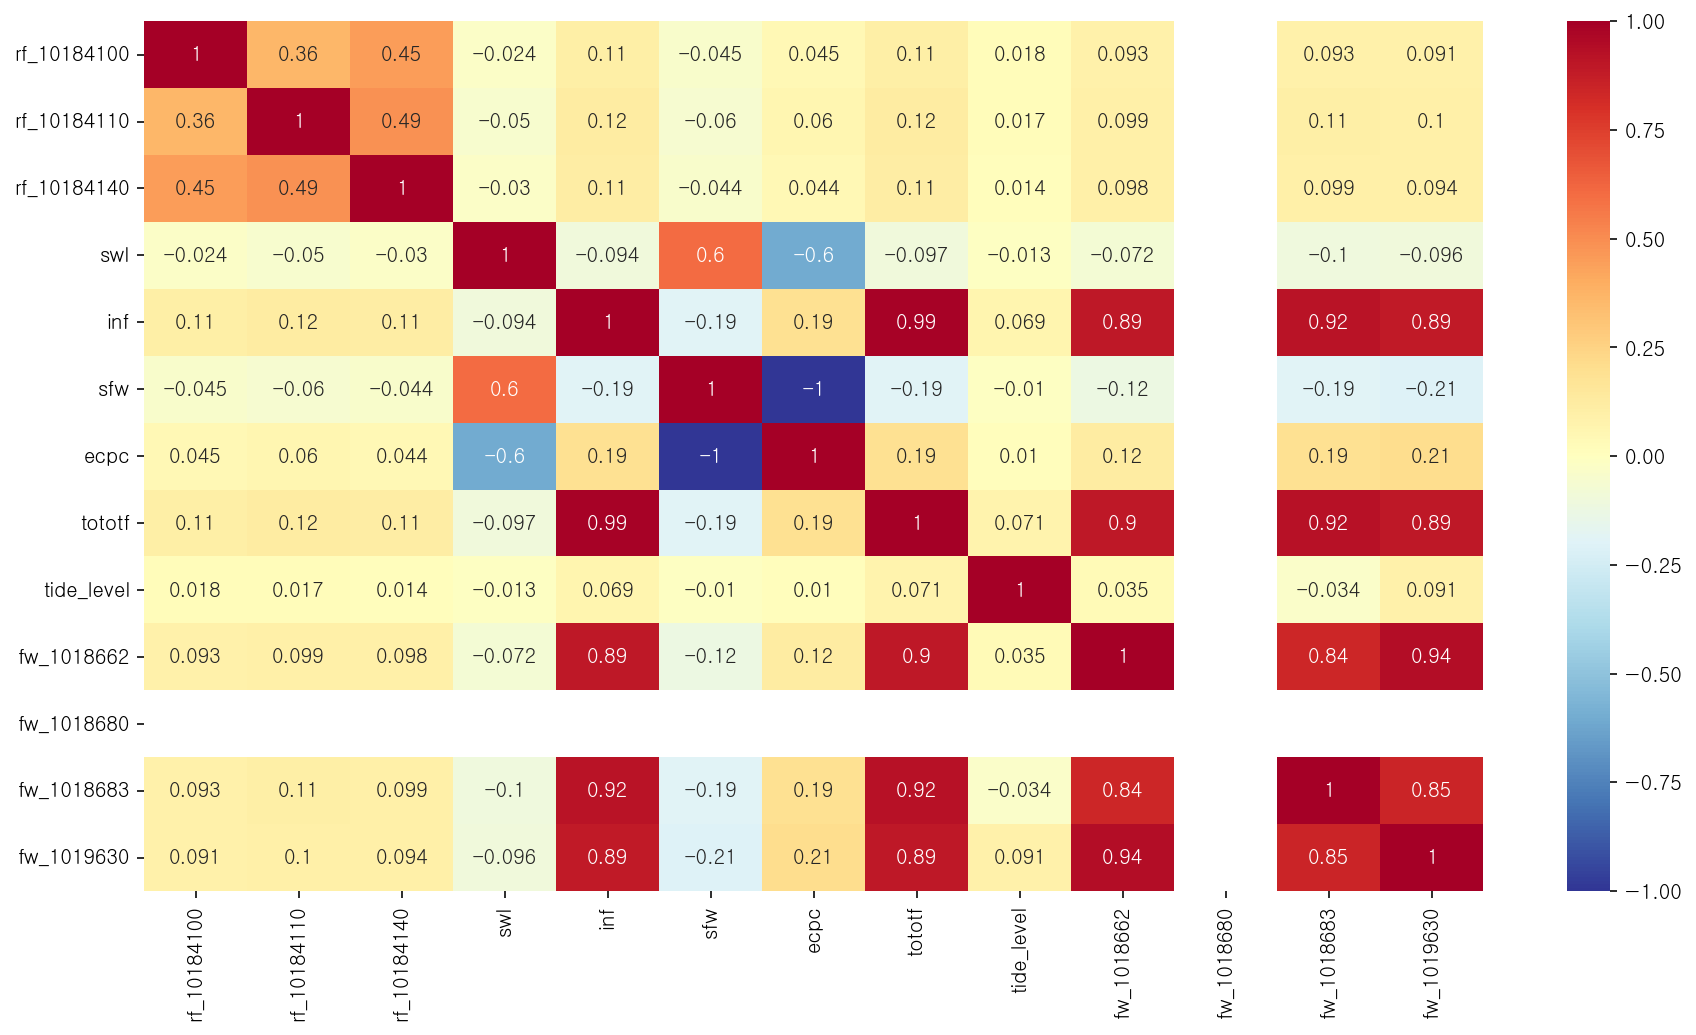

In [116]:
plt.figure(figsize = (15,8))
sns.heatmap(cordata, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)

In [117]:
data.columns

Index(['rf_10184100', 'rf_10184110', 'rf_10184140', 'swl', 'inf', 'sfw',
       'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018680',
       'fw_1018683', 'fw_1019630'],
      dtype='object')

In [118]:
data = data.drop(columns = ["fw_1018680","fw_1018683"])
data

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1019630
ymdhm,,,,,,,,,,,
2012-05-01 00:00:00,0.0,0.0,0.0,24.800,555.00,219.07,24.93,555.00,445.0,469.05,540.18
2012-05-01 00:10:00,0.0,0.0,0.0,24.794,464.60,218.86,25.15,562.90,449.0,498.00,540.18
2012-05-01 00:20:00,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,451.0,490.68,540.18
2012-05-01 00:30:00,0.0,0.0,0.0,24.789,464.80,218.69,25.31,563.10,452.0,476.21,552.17
2012-05-01 00:40:00,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,450.0,476.21,564.29
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.0,0.0,0.0,25.040,259.23,212.86,31.14,259.23,510.0,319.84,974.40
2022-07-18 23:20:00,0.0,0.0,0.0,25.040,260.46,212.86,31.14,260.46,492.0,314.01,1006.88
2022-07-18 23:30:00,0.0,0.0,0.0,25.040,259.37,212.86,31.14,259.37,475.0,387.55,1039.90


In [119]:
data = data.reset_index(drop=True)
data

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1019630
0,0.0,0.0,0.0,24.800,555.00,219.07,24.93,555.00,445.0,469.05,540.18
1,0.0,0.0,0.0,24.794,464.60,218.86,25.15,562.90,449.0,498.00,540.18
2,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,451.0,490.68,540.18
3,0.0,0.0,0.0,24.789,464.80,218.69,25.31,563.10,452.0,476.21,552.17
4,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,450.0,476.21,564.29
...,...,...,...,...,...,...,...,...,...,...,...
170347,0.0,0.0,0.0,25.040,259.23,212.86,31.14,259.23,510.0,319.84,974.40
170348,0.0,0.0,0.0,25.040,260.46,212.86,31.14,260.46,492.0,314.01,1006.88
170349,0.0,0.0,0.0,25.040,259.37,212.86,31.14,259.37,475.0,387.55,1039.90
170350,0.0,0.0,0.0,25.040,259.13,212.86,31.14,259.13,458.0,454.91,1073.46


In [120]:
data_t1 = data.iloc[:-1,9:]
data_t1.columns = ['fw_1018662_t-1','fw_1019630_t-1']
data_t1.index += 1
data_t2 = data.iloc[:-2,9:]
data_t2.columns = ['fw_1018662_t-2','fw_1019630_t-2']
data_t2.index += 2
data_t3 = data.iloc[:-3,9:]
data_t3.columns = ['fw_1018662_t-3','fw_1019630_t-3']
data_t3.index += 3
data_t4 = data.iloc[:-4,9:]
data_t4.columns = ['fw_1018662_t-4','fw_1019630_t-4']
data_t4.index += 4

In [121]:
data_t1

,fw_1018662_t-1,fw_1019630_t-1
1,469.05,540.18
2,498.00,540.18
3,490.68,540.18
4,476.21,552.17
5,476.21,564.29
...,...,...
170347,319.84,926.70
170348,319.84,974.40
170349,314.01,1006.88
170350,387.55,1039.90


In [122]:
data_t2

,fw_1018662_t-2,fw_1019630_t-2
2,469.05,540.18
3,498.00,540.18
4,490.68,540.18
5,476.21,552.17
6,476.21,564.29
...,...,...
170347,325.72,865.00
170348,319.84,926.70
170349,319.84,974.40
170350,314.01,1006.88


In [123]:
data = pd.concat([data,data_t1,data_t2,data_t3,data_t4], axis=1)
data

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1019630,fw_1018662_t-1,fw_1019630_t-1,fw_1018662_t-2,fw_1019630_t-2,fw_1018662_t-3,fw_1019630_t-3,fw_1018662_t-4,fw_1019630_t-4
0,0.0,0.0,0.0,24.800,555.00,219.07,24.93,555.00,445.0,469.05,540.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,24.794,464.60,218.86,25.15,562.90,449.0,498.00,540.18,469.05,540.18,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,451.0,490.68,540.18,498.00,540.18,469.05,540.18,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,24.789,464.80,218.69,25.31,563.10,452.0,476.21,552.17,490.68,540.18,498.00,540.18,469.05,540.18,NaN,NaN
4,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,450.0,476.21,564.29,476.21,552.17,490.68,540.18,498.00,540.18,469.05,540.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170347,0.0,0.0,0.0,25.040,259.23,212.86,31.14,259.23,510.0,319.84,974.40,319.84,926.70,325.72,865.00,337.64,805.46,337.64,706.48
170348,0.0,0.0,0.0,25.040,260.46,212.86,31.14,260.46,492.0,314.01,1006.88,319.84,974.40,319.84,926.70,325.72,865.00,337.64,805.46
170349,0.0,0.0,0.0,25.040,259.37,212.86,31.14,259.37,475.0,387.55,1039.90,314.01,1006.88,319.84,974.40,319.84,926.70,325.72,865.00
170350,0.0,0.0,0.0,25.040,259.13,212.86,31.14,259.13,458.0,454.91,1073.46,387.55,1039.90,314.01,1006.88,319.84,974.40,319.84,926.70


In [125]:
data.head(10)

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1019630,fw_1018662_t-1,fw_1019630_t-1,fw_1018662_t-2,fw_1019630_t-2,fw_1018662_t-3,fw_1019630_t-3,fw_1018662_t-4,fw_1019630_t-4
0,0.0,0.0,0.0,24.800,555.0,219.07,24.93,555.0,445.0,469.05,540.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,24.794,464.6,218.86,25.15,562.9,449.0,498.00,540.18,469.05,540.18,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,24.789,478.1,218.69,25.31,576.4,451.0,490.68,540.18,498.00,540.18,469.05,540.18,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,24.789,464.8,218.69,25.31,563.1,452.0,476.21,552.17,490.68,540.18,498.00,540.18,469.05,540.18,NaN,NaN
4,0.0,0.0,0.0,24.789,478.1,218.69,25.31,576.4,450.0,476.21,564.29,476.21,552.17,490.68,540.18,498.00,540.18,469.05,540.18
5,0.0,0.0,0.0,24.789,478.1,218.69,25.31,576.4,447.0,476.21,564.29,476.21,564.29,476.21,552.17,490.68,540.18,498.00,540.18
6,0.0,0.0,0.0,24.790,464.0,218.73,25.27,562.0,442.0,483.42,564.29,476.21,564.29,476.21,564.29,476.21,552.17,490.68,540.18
7,0.0,0.0,0.0,24.789,563.1,218.69,25.31,563.1,436.0,476.21,564.29,483.42,564.29,476.21,564.29,476.21,564.29,476.21,552.17
8,0.0,0.0,0.0,24.789,576.4,218.69,25.31,576.4,428.0,483.42,576.54,476.21,564.29,483.42,564.29,476.21,564.29,476.21,564.29
9,0.0,0.0,0.0,24.789,576.4,218.69,25.31,576.4,420.0,483.42,576.54,483.42,576.54,476.21,564.29,483.42,564.29,476.21,564.29


In [126]:
target.head(10)

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,311.7,301.2,291.0,277.3
2012-05-01 00:50:00,311.7,301.2,291.0,277.3
2012-05-01 01:00:00,312.7,301.2,291.0,277.3
2012-05-01 01:10:00,311.7,301.2,291.0,277.3
2012-05-01 01:20:00,312.7,301.2,291.0,278.3


In [127]:
data = data.iloc[4:,]
target = target.iloc[4:,]

In [128]:
_target = target.reset_index(drop=True)
_data = data.reset_index(drop=True)

_data.index += 1

tot=pd.concat((_data,_target),axis=1)
tot=tot.sort_index()

tot=tot.iloc[1:-1]

target = tot.loc[:,submission.columns]
data = tot.drop(submission.columns,axis=1)

In [129]:
train_target=target.iloc[:-len(submission),:]
test_target=target.iloc[-len(submission):,:]

train_data=data.iloc[:-len(submission),:]
test_data=data.iloc[-len(submission):,:]

In [134]:
train_target.fillna(train_target.mean(),inplace=True)
test_target.fillna(train_target.mean(),inplace=True)
train_data.fillna(train_data.mean(),inplace=True)
test_data.fillna(train_data.mean(),inplace=True)

In [135]:
train_data

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1019630,fw_1018662_t-1,fw_1019630_t-1,fw_1018662_t-2,fw_1019630_t-2,fw_1018662_t-3,fw_1019630_t-3,fw_1018662_t-4,fw_1019630_t-4
1,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,450.0,476.21,564.29,476.21,552.17,490.68,540.18,498.00,540.18,469.05,540.18
2,0.0,0.0,0.0,24.789,478.10,218.69,25.31,576.40,447.0,476.21,564.29,476.21,564.29,476.21,552.17,490.68,540.18,498.00,540.18
3,0.0,0.0,0.0,24.790,464.00,218.73,25.27,562.00,442.0,483.42,564.29,476.21,564.29,476.21,564.29,476.21,552.17,490.68,540.18
4,0.0,0.0,0.0,24.789,563.10,218.69,25.31,563.10,436.0,476.21,564.29,483.42,564.29,476.21,564.29,476.21,564.29,476.21,552.17
5,0.0,0.0,0.0,24.789,576.40,218.69,25.31,576.40,428.0,483.42,576.54,476.21,564.29,483.42,564.29,476.21,564.29,476.21,564.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163431,0.0,0.0,0.0,25.180,140.89,217.99,26.01,140.89,232.0,314.01,471.08,355.94,438.33,387.55,386.43,413.83,376.45,427.30,366.60
163432,0.0,0.0,0.0,25.180,140.94,217.99,26.01,140.94,220.0,285.72,493.58,314.01,471.08,355.94,438.33,387.55,386.43,413.83,376.45
163433,0.0,0.0,0.0,25.180,141.07,217.99,26.01,141.07,208.0,274.78,505.03,285.72,493.58,314.01,471.08,355.94,438.33,387.55,386.43
163434,0.0,0.0,0.0,25.180,141.01,217.99,26.01,141.01,196.0,269.40,505.03,274.78,505.03,285.72,493.58,314.01,471.08,355.94,438.33


In [136]:
train_target

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
1,311.7,301.2,291.0,277.3
2,312.7,301.2,291.0,277.3
3,311.7,301.2,291.0,277.3
4,312.7,301.2,291.0,278.3
5,312.7,301.2,291.0,278.3
...,...,...,...,...
163431,281.7,281.2,278.0,271.3
163432,279.7,279.2,278.0,272.3
163433,278.7,277.2,277.0,272.3
163434,277.7,276.2,276.0,271.3


In [137]:
test_data

,rf_10184100,rf_10184110,rf_10184140,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1019630,fw_1018662_t-1,fw_1019630_t-1,fw_1018662_t-2,fw_1019630_t-2,fw_1018662_t-3,fw_1019630_t-3,fw_1018662_t-4,fw_1019630_t-4
163436,0.0,0.0,0.0,25.19,140.56,218.36,25.64,140.56,173.0,269.40,482.26,264.07,493.58,269.40,505.03,274.78,505.03,285.72,493.58
163437,0.0,0.0,0.0,25.19,140.60,218.36,25.64,140.60,162.0,269.40,471.08,269.40,482.26,264.07,493.58,269.40,505.03,274.78,505.03
163438,0.0,0.0,0.0,25.19,140.78,218.36,25.64,140.78,151.0,280.22,449.12,269.40,471.08,269.40,482.26,264.07,493.58,269.40,505.03
163439,0.0,0.0,0.0,25.20,755.90,218.73,25.27,140.90,141.0,296.87,417.17,280.22,449.12,269.40,471.08,269.40,482.26,264.07,493.58
163440,0.0,0.0,0.0,25.19,0.00,218.36,25.64,140.94,130.0,302.53,386.43,296.87,417.17,280.22,449.12,269.40,471.08,269.40,482.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170343,0.0,0.0,0.0,25.04,865.96,212.86,31.14,259.30,528.0,319.84,926.70,325.72,865.00,337.64,805.46,337.64,706.48,343.69,552.17
170344,0.0,0.0,0.0,25.04,259.23,212.86,31.14,259.23,510.0,319.84,974.40,319.84,926.70,325.72,865.00,337.64,805.46,337.64,706.48
170345,0.0,0.0,0.0,25.04,260.46,212.86,31.14,260.46,492.0,314.01,1006.88,319.84,974.40,319.84,926.70,325.72,865.00,337.64,805.46
170346,0.0,0.0,0.0,25.04,259.37,212.86,31.14,259.37,475.0,387.55,1039.90,314.01,1006.88,319.84,974.40,319.84,926.70,325.72,865.00


In [138]:
test_target

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
163436,0.0,0.0,0.0,0.0
163437,0.0,0.0,0.0,0.0
163438,0.0,0.0,0.0,0.0
163439,0.0,0.0,0.0,0.0
163440,0.0,0.0,0.0,0.0
...,...,...,...,...
170343,0.0,0.0,0.0,0.0
170344,0.0,0.0,0.0,0.0
170345,0.0,0.0,0.0,0.0
170346,0.0,0.0,0.0,0.0


In [140]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, shuffle=True)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)

params = {
    "n_estimators" : (100, 150, 200, 500)
}

In [141]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(rf,
                       param_grid=params,
                       cv = kfold,
                       n_jobs=-1)

In [142]:
grid_cv.fit(train_data,train_target)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_estimators': (100, 150, 200, 500)})

In [143]:
grid_cv.best_estimator_

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [144]:
model=grid_cv.best_estimator_
model.fit(train_data,train_target)
y_pred=model.predict(test_data)

_submission_raw.iloc[:,:] = y_pred
_submission_raw.to_csv('ans.csv')

In [145]:
grid_cv

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_estimators': (100, 150, 200, 500)})